In [12]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy


In [13]:
def init(N):
    return np.random.choice([-1, 1], N)


def gen_neigh(L):
    N = L**2

    neigh = np.empty((N, 4), dtype=np.int16)

    for i in range(N):
        if i % L == L - 1:  # dir
            right = i - L + 1
        else:
            right = i + 1

        neigh[i][0] = right

        if i >= (L**2) - L:  # cima
            up = i - N + L
        else:
            up = i + L

        neigh[i][1] = up

        if i % L == 0:  # esq
            left = i + L - 1
        else:
            left = i - 1

        neigh[i][2] = left

        if i < L:  # baixo
            down = i + N - L
        else:
            down = i - L

        neigh[i][3] = down

    return neigh


@jit(nopython=True)
def rand_site(N):
    return np.random.choice(np.array(range(N)))


@jit(nopython=True)
def calc_energy(spins, neigh):
    sum = 0

    for i in spins:
        neigh_i = neigh[i][0:2]

        for j in neigh_i:
            sum -= spins[i] * spins[j]

    return sum


# energy difference when i is flipped
@jit(nopython=True)
def en_diff(i, energy, spins, neigh):
    sum = 0

    for j in neigh[i]:
        sum += spins[j]

    delta = 2 * spins[i] * sum

    return delta


@jit(nopython=True)
def get_expos(T):
    expos = np.zeros(5, dtype=np.float32)
    expos[0] = np.exp(8 / T)
    expos[1] = np.exp(4 / T)
    expos[2] = 1
    expos[3] = np.exp(-4 / T)
    expos[4] = np.exp(-8 / T)

    return expos


@jit(nopython=True)
def mc_step(spins, energy, neigh):
    for i in range(N):
        delta_e = en_diff(i, energy, spins, neigh)
        
        de = int(delta_e*0.25 + 2)
        P = expos[de]
        r = np.random.rand()

        if r <= P:
            spins[i] = -spins[i]
            energy += delta_e

    return spins, energy


In [14]:
L = 32
N = L**2
T = 1.5
neigh = gen_neigh(L)
expos = get_expos(T)

spins = init(N)
energy = calc_energy(spins, neigh)

print('en:', energy)

spins, energy = mc_step(spins, energy, neigh)
print('en mc', energy)
energy = calc_energy(spins, neigh)
print('en calc', energy, '\n\n')

spins, energy = mc_step(spins, energy, neigh)
print('en mc', energy)
energy = calc_energy(spins, neigh)
print('en calc', energy, '\n\n')

spins, energy = mc_step(spins, energy, neigh)
print('en mc', energy)
energy = calc_energy(spins, neigh)
print('en calc', energy, '\n\n')

en: 0
en mc -776
en calc -1010 


en mc -1474
en calc -2048 


en mc -2256
en calc 1092 




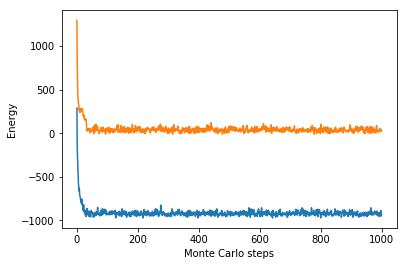

In [15]:
L = 32
N = L**2
T = 1.5
neigh = gen_neigh(L)
expos = get_expos(T)

fig, ax = plt.subplots()
ax.set_xlabel("Monte Carlo steps")
ax.set_ylabel("Energy")

for i in range(2):
    spins = init(N)
    energy = calc_energy(spins, neigh)

    energies = []

    for _ in range(1000):
        spins, energy = mc_step(spins, energy, neigh)

        energies.append(energy)

    ax.plot(energies)

plt.show()